## IST 707 HW3- Abhiraj Singh 

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as gbm

## Load Data 

In [2]:
#read the csv file
train_df = pd.read_csv('Disease Prediction Training.csv')
train_df.head(5)

test_df = pd.read_csv('Disease Prediction Testing.csv')

In [ ]:
#This shows that the dataset has no NA values
train_df.isna().sum()

Age                     0
Height                  0
Weight                  0
High Blood Pressure     0
Low Blood Pressure      0
Smoke                   0
Alcohol                 0
Exercise                0
Disease                 0
Gender_female           0
Gender_male             0
Cholesterol_high        0
Cholesterol_normal      0
Cholesterol_too high    0
Glucose_high            0
Glucose_normal          0
Glucose_too high        0
dtype: int64

In [ ]:
#This will help us get familliar with the train dataset's statistical features
print("The shape of the train dataframe is:",train_df.shape)

#check whether data is balanced or unbalance

print("Total number of 1's in the dataframe",len(train_df[train_df.Disease == 1]))
print("Total number of 0's in the dataframe",len(train_df[train_df.Disease == 0]))

train_df.describe().transpose()

The shape of the train dataframe is: (49000, 12)
Total number of 1's in the dataframe 24498
Total number of 0's in the dataframe 24502


,count,mean,std,min,25%,50%,75%,max
Age,49000.0,52.853306,6.763065,29.0,48.0,53.0,58.0,64.0
Height,49000.0,164.366878,8.216637,55.0,159.0,165.0,170.0,207.0
Weight,49000.0,74.190527,14.329934,10.0,65.0,72.0,82.0,200.0
High Blood Pressure,49000.0,128.698939,147.624582,-150.0,120.0,120.0,140.0,14020.0
Low Blood Pressure,49000.0,96.917367,200.368069,0.0,80.0,80.0,90.0,11000.0
Smoke,49000.0,0.088265,0.283683,0.0,0.0,0.0,0.0,1.0
Alcohol,49000.0,0.054245,0.226503,0.0,0.0,0.0,0.0,1.0
Exercise,49000.0,0.803204,0.397581,0.0,1.0,1.0,1.0,1.0
Disease,49000.0,0.499959,0.500005,0.0,0.0,0.0,1.0,1.0


## Data Visualization

Based on the below plots we can see that the numerical countinuous variables have many outliers.

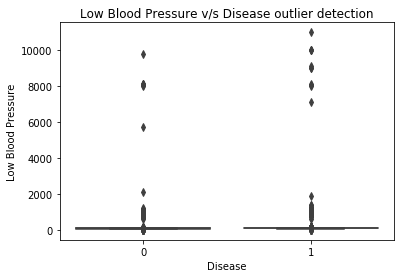

In [ ]:
# Data Visualization to assess the outlier in the dataset

sns.boxplot(y=train_df["Low Blood Pressure"], x=train_df["Disease"]).set_title("Low Blood Pressure v/s Disease outlier detection")
plt.show()

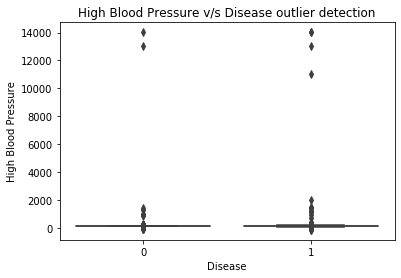

In [ ]:
# Data Visualization to assess the outlier in the dataset

sns.boxplot(y=train_df["High Blood Pressure"], x=train_df["Disease"]).set_title("High Blood Pressure v/s Disease outlier detection")
plt.show()

The above outliers are being treated by using the winsorization methods. Winsorizing or winsorization is the transformation of statistics which limits extreme values in the statistical data to reduce the effect of possibly spurious outliers. The below cell depicts the implementation.

In [3]:
#Curing the outliers by winsorizing 

winsorize(train_df['High Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)
winsorize(train_df['Low Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)

winsorize(test_df['High Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)
winsorize(test_df['Low Blood Pressure'], limits=[0.01,0.04],inplace=True, axis=None)

masked_array(data=[80, 70, 80, ..., 90, 90, 80],
             mask=False,
       fill_value=999999)

## One-hot encoding

To make the data usable for the machine learning algorithms we need to apply we need to convert the categoriacal variable to the numerical values using the one hot encoding. For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In [4]:
#One-hot encoding
cols = ['Gender','Cholesterol','Glucose']
train_df = pd.get_dummies(train_df, columns=cols)

#perform same for the test data
cols = ['Gender','Cholesterol','Glucose']
test_df = pd.get_dummies(test_df, columns=cols)



## Data Scaling and splitting of dataset

Feature scaling is essential for machine learning algorithms that calculate distances between data. Therefore, we need to have standardized data. The below cell shows the scaling/standardization.

We perform train-test split in this section. We need training set to allow the machine learning learn patterns or gain information. Then test data is helpful to know how well our model performs on the unseen dataset. This allows us to see how well the model is able to generalize. This is a crucial step to determine the performance of the model

In [7]:
x = train_df.drop(columns=['Disease'])
y = train_df['Disease']

In [8]:
ID=test_df["ID"]
x_test=test_df.drop(columns=['ID'])

In [9]:
#generating the bins
labels = [1,2,3,4,5]
x['Age']=pd.qcut(x['Age'],5,labels=labels)
x_test['Age']=pd.qcut(x_test['Age'],5,labels=labels)

x['Height']=pd.qcut(x['Height'],5,labels=labels)
x_test['Height']=pd.qcut(x_test['Height'],5,labels=labels)

x['Weight']=pd.qcut(x['Weight'],5,labels=labels)
x_test['Weight']=pd.qcut(x_test['Weight'],5,labels=labels)

In [44]:
#scaling the data using the minmax scaler
scaler = MinMaxScaler()
scaler.fit(x)
train_std = scaler.transform(x)

scaler.fit(x_test)
test_std = scaler.transform(x_test)

In [13]:
#splitting the data into train and validation for non-standarized dataset

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=6)

#splitting the data into train and validation for standarized dataset

x_train_std, x_val_std, y_train_std, y_val_std = train_test_split(train_std, y, test_size=0.25, random_state=6)

# Naive Bayes Classifier

Base model implementation: We can use the non-standardized data for this algorithm because it is dependent on the probability. That means it does not consider having eucleadian distance or any distance based decisions. Therefore, we will use the non-standarized data for training, validation and testing. 

In [14]:
#guassian Naive Bayes base model
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_val)

In [ ]:
cfm = confusion_matrix(y_val, pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(pred, y_val))
print(classification_report(pred, y_val))

[[4853 1322]
 [2557 3518]]
The accuracy of the model is:  0.6833469387755102
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      7410
           1       0.58      0.73      0.64      4840

    accuracy                           0.68     12250
   macro avg       0.68      0.69      0.68     12250
weighted avg       0.70      0.68      0.69     12250



In [ ]:
gnb_pred = gnb.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, gnb_pred)*100, 2)}%")

Accuracy: 68.33%


Now using the grid search we will try to optimize the naive bayes

In [ ]:
#We can tune using the GridSearchCV
gnb_grid = GaussianNB()
tuned_parameters = [{'var_smoothing': [2,1,0.1,0.2,0.01,0.02,0.05,0.001]}]

grid_search = GridSearchCV(estimator = gnb_grid, param_grid = tuned_parameters, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'var_smoothing': [2, 1, 0.1, 0.2, 0.01, 0.02, 0.05,
                                            0.001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(grid_search.best_params_)  #getting the best parameters

{'var_smoothing': 0.001}


# Naive Bayes Guassian: Best Model

In [15]:
#fitting the training data to the best gnb model  
gnb_best = GaussianNB(var_smoothing= 0.001)
gnb_best=gnb_best.fit(x_train,y_train)

gnb_pred = gnb_best.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, gnb_pred)*100, 2)}%")

Accuracy: 72.02%


In [ ]:
cfm = confusion_matrix(y_val, gnb_pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(gnb_pred, y_val))
print(classification_report(gnb_pred, y_val))

[[5146 1029]
 [2399 3676]]
The accuracy of the model is:  0.7201632653061224
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      7545
           1       0.61      0.78      0.68      4705

    accuracy                           0.72     12250
   macro avg       0.72      0.73      0.72     12250
weighted avg       0.75      0.72      0.72     12250



ROC AUC=0.786


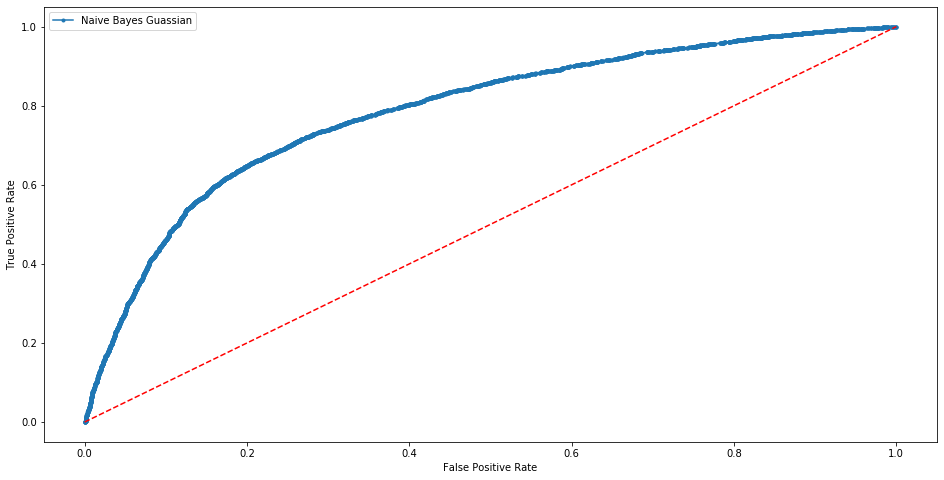

In [ ]:
prob = gnb_best.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='Naive Bayes Guassian')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Multinomial Naive Bayes Classifier

Base model for MNB

In [ ]:
mnb = MultinomialNB(alpha=0.5)
mnb=mnb.fit(x_train, y_train)
pred = mnb.predict(x_val)

In [ ]:
cfm = confusion_matrix(y_val, pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(pred, y_val))
print(classification_report(pred, y_val))

[[4647 1528]
 [2980 3095]]
The accuracy of the model is:  0.632
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      7627
           1       0.51      0.67      0.58      4623

    accuracy                           0.63     12250
   macro avg       0.63      0.64      0.63     12250
weighted avg       0.66      0.63      0.64     12250



In [ ]:
mnb_pred = mnb.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, mnb_pred)*100, 2)}%")

Accuracy: 63.2%


# MNB Best Model using GridSearch

In [ ]:
#We can tune using the GridSearchCV
mnb_grid = MultinomialNB()
tuned_parameters = [{'alpha': [10,2,1,0.5,0.03,0.05]}]

grid_search = GridSearchCV(estimator = mnb_grid, param_grid = tuned_parameters, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [10, 2, 1, 0.5, 0.03, 0.05]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(grid_search.best_params_)  #getting the best parameters

{'alpha': 10}


In [16]:
#building best model for the MNB
mnb_best = MultinomialNB(alpha=10)
mnb_best=mnb_best.fit(x_train, y_train)
pred = mnb_best.predict(x_val)

In [17]:
#confusion matrix to see evaluation metrics
cfm = confusion_matrix(y_val, pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(pred, y_val))
print(classification_report(pred, y_val))

[[4647 1528]
 [2978 3097]]
The accuracy of the model is:  0.6321632653061224
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      7625
           1       0.51      0.67      0.58      4625

    accuracy                           0.63     12250
   macro avg       0.63      0.64      0.63     12250
weighted avg       0.66      0.63      0.64     12250



In [18]:
mnb_pred = mnb_best.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, mnb_pred)*100, 2)}%")

Accuracy: 63.22%


ROC AUC=0.694


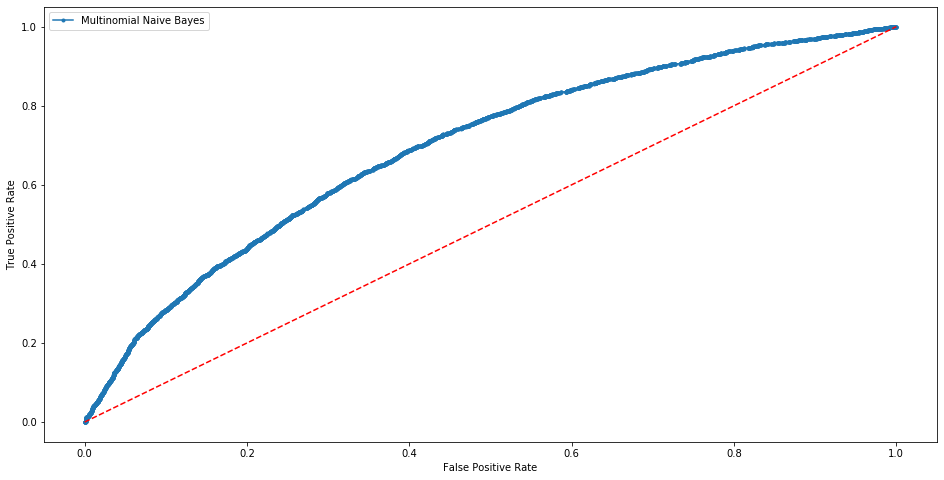

In [ ]:
prob = mnb_best.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='Multinomial Naive Bayes')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# KNN: Base Model

KNN are sensitive to the outliers. We will compare the model with standardized data and non-standardized data. Based on performance, we will move ahead.

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val_std, y_pred)*100, 2)}%")

Accuracy: 69.15%


In [ ]:
#implementation with the standardized dataset
classifier = KNeighborsClassifier()
classifier.fit(x_train_std, y_train)

y_pred = classifier.predict(x_val_std)
print(f"Accuracy: {round(metrics.accuracy_score(y_val_std, y_pred)*100, 2)}%")

Accuracy: 68.85%


Based on the above results we can clearly see that the model performs similar on standardized data and non-standardized data. Despite the same results we will move ahead with the standardized dataset. 

Reason: The k-nearest neighbor algorithm relies on majority voting based on class membership of 'k' nearest samples for a given test point. The nearness of samples is typically based on Euclidean distance. Since it is based on eucleadian distance we can consider the standardized data.

# KNN Best Model using GridSearch 

In [ ]:
#create a dictionary of all values we want to test for n_neighbors
knn = KNeighborsClassifier()
grid_search = {'n_neighbors': [20,40,60,80,100,150,175,200, 250],'p':[1,2,3,4]}

#use gridsearch to test all values for n_neighbors
grid_search = GridSearchCV(knn, grid_search, cv=3,n_jobs=-1)
grid_search.fit(x_train_std,y_train_std)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [20, 40, 60, 80, 100, 150, 175, 200,
                                         250],
                         'p': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_search.best_params_)  #getting the best parameters

{'n_neighbors': 60, 'p': 1}


In [36]:
#implementation of best model with the standardized dataset
classifier = KNeighborsClassifier(n_neighbors=60,p=1)
classifier = classifier.fit(x_train_std, y_train_std)

y_pred = classifier.predict(x_val_std)
print(f"Accuracy: {round(metrics.accuracy_score(y_val_std, y_pred)*100, 2)}%")

Accuracy: 72.26%


In [ ]:
#confusion matrix to see evaluation metrics
cfm = confusion_matrix(y_val_std, y_pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(y_pred, y_val_std))
print(classification_report(y_pred, y_val_std))

[[4766 1409]
 [1989 4086]]
The accuracy of the model is:  0.7226122448979592
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      6755
           1       0.67      0.74      0.71      5495

    accuracy                           0.72     12250
   macro avg       0.72      0.72      0.72     12250
weighted avg       0.73      0.72      0.72     12250



# Support Vector Machine (SVM)

1) Linear SVC
2) Non-Linear SVM

The performance of support vector machine will be affected if the values are not standardized. Therefore, we need to consider the standardized test and train dataset

In [ ]:
#Best Linear Support Vector Classifier

lin_clf = svm.LinearSVC()

param_grid = {'C':[0.25,0.5,0.75,1],'penalty':['l2']}

grid_search = GridSearchCV(lin_clf,param_grid,cv=3)
grid_search.fit(x_train_std,y_train_std)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_search.best_params_)  #getting the best parameters

{'C': 1, 'penalty': 'l2'}


In [20]:
#Linear SVC best model
lin_clf_best = svm.LinearSVC(C=1,penalty='l2')
lin_clf_best = lin_clf_best.fit(x_train_std,y_train_std)

y_pred = lin_clf_best.predict(x_val_std)
print(f"Accuracy: {round(metrics.accuracy_score(y_val_std, y_pred)*100, 2)}%")

Accuracy: 72.96%


In [ ]:
#confusion matrix to see evaluation metrics
cfm = confusion_matrix(y_val_std, y_pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(y_pred, y_val_std))
print(classification_report(y_pred, y_val_std))

[[4844 1331]
 [1982 4093]]
The accuracy of the model is:  0.7295510204081632
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      6826
           1       0.67      0.75      0.71      5424

    accuracy                           0.73     12250
   macro avg       0.73      0.73      0.73     12250
weighted avg       0.74      0.73      0.73     12250



# Non-Linear SVM

In [ ]:
#Non Linear SVM

rbf_clf = svm.SVC()

param_grid = {'C':[0.25,0.75,1], 'gamma':[0.001,0.1,0.7,0.8,0.9,1]}
grid_search = GridSearchCV(rbf_clf, param_grid, cv=3,n_jobs=-1)
grid_search.fit(x_train, y_train)

In [ ]:
print(grid_search.best_params_)  #getting the best parameters

In [35]:
#preparing the best non-linear svm using the best parameters
rbf_clf_best = svm.SVC(C=1,gamma=0.7,probability=True)
rbf_clf_best = rbf_clf_best.fit(x_train,y_train)

y_pred = rbf_clf_best.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val_std, y_pred)*100, 2)}%")

Accuracy: 71.13%


ROC AUC=0.748


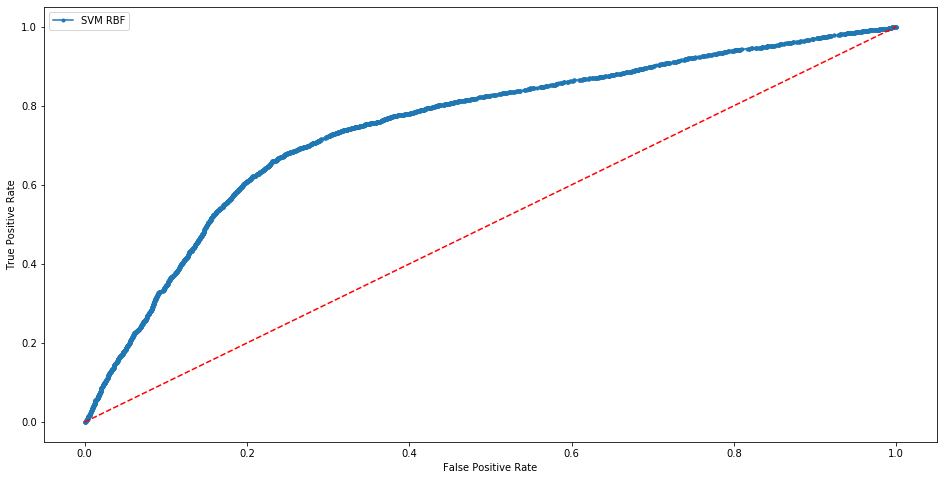

In [ ]:
prob = rbf_clf_best.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='SVM RBF')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Random Forest 

Implementation of base model on non-standardized dataset. 

Reason: Random Forest is a tree-based model and hence does not require feature scaling. Even if you apply Normalization then also the result would be the same.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=16)
results = cross_val_score(rf_clf, x_train, y_train, cv=3)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, y_pred)*100, 2)}%")

Accuracy: 61.67%


# Random Forest: Grid Search Implementation 

In [ ]:
rf_grid = RandomForestClassifier()

grid_search = {'n_estimators':[50,100,150,200,250], 
              'max_features':[2,3,4,5,6],
              'min_samples_split': [5, 10],
              'max_depth': [ 15, 20,30],
              'min_samples_leaf': [ 5, 10]}

#use gridsearch to get the best paramenters
rf_grid = GridSearchCV(rf_grid, grid_search, cv=3,n_jobs=-1)

#fit model to data
rf_grid.fit(x_train, y_train)
rf_grid.best_params_

{'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 50}

In [29]:
rf_clf_best = RandomForestClassifier(n_estimators=50, max_features=3, max_depth=20, min_samples_leaf=10,min_samples_split=5,random_state=16)
rf_model=rf_clf_best.fit(x_train,y_train)
y_pred = rf_model.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, y_pred)*100, 2)}%")

Accuracy: 73.25%


In [ ]:
#confusion matrix to see evaluation metrics
cfm = confusion_matrix(y_val, y_pred)
print(cfm)
print('The accuracy of the model is: ',accuracy_score(y_pred, y_val))
print(classification_report(y_pred, y_val))

[[4806 1369]
 [1871 4204]]
The accuracy of the model is:  0.7355102040816327
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      6677
           1       0.69      0.75      0.72      5573

    accuracy                           0.74     12250
   macro avg       0.74      0.74      0.73     12250
weighted avg       0.74      0.74      0.74     12250



ROC AUC=0.800


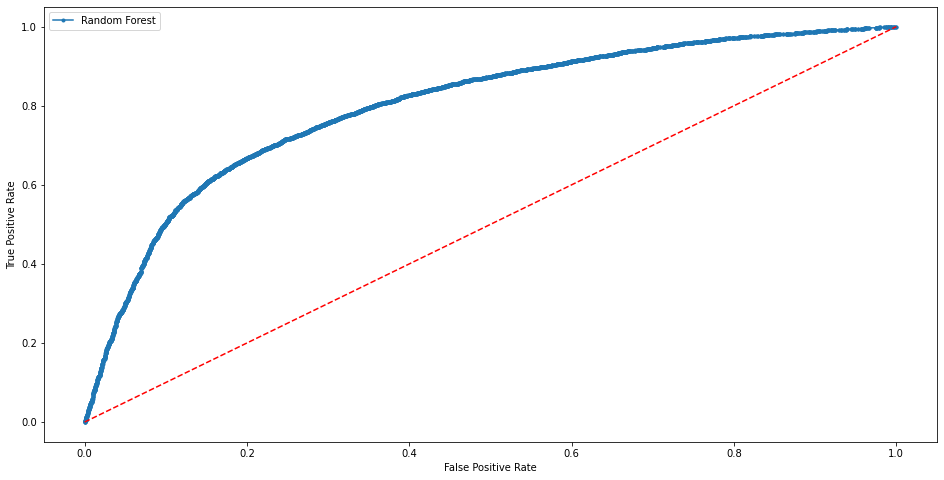

In [ ]:
#AUC ROC curve
prob = rf_clf_best.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Feature Importance

feature_imp = pd.DataFrame(rf_clf_best.feature_importances_, index=x_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
High Blood Pressure,0.395632
Low Blood Pressure,0.158727
Age,0.145732
Weight,0.098477
Height,0.076555
Cholesterol_normal,0.037322
Cholesterol_too high,0.034443
Exercise,0.011641
Cholesterol_high,0.007485
Gender_female,0.006964


# GBM

Implementation of base model on non-standardized dataset. We know that GBM can be sensitive to the outliers. Outliers can be bad for boosting because boosting builds each tree on previous trees' residuals/errors. Outliers will have much larger residuals than non-outliers, so gradient boosting will focus a disproportionate amount of its attention on those points. Also, we do not require standardization for GBM.

In [ ]:
gbm_model = gbm(n_estimators=100, random_state=16)
results = cross_val_score(gbm_model, x_train, y_train, cv=3)
print(f"Accuracy for GBM: {round(results.mean()*100, 2)}%")

Accuracy for GBM: 73.73%


In [ ]:
#Grid search implementation to get the best parameters
gbm_model = gbm()
grid_search = {'learning_rate': [0.02, 0.1, 0.001],
              'n_estimators': [50,100],
               'max_depth': [2,10,30],
             'min_samples_split': [5, 10],
               'min_samples_leaf': [5, 10]}
gbm_model = GridSearchCV(gbm_model, grid_search,n_jobs=-1)
gbm_model.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [ ]:
gbm_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

In [32]:
gbm_best_model = gbm(n_estimators=100, learning_rate=0.1,max_depth= 2, random_state=16,min_samples_leaf=10,min_samples_split=5)
gbm_best_model = gbm_best_model.fit(x_train,y_train)
y_pred = gbm_best_model.predict(x_val)
print(f"Accuracy: {round(metrics.accuracy_score(y_val, y_pred)*100, 2)}%")

Accuracy: 73.58%


ROC AUC=0.801


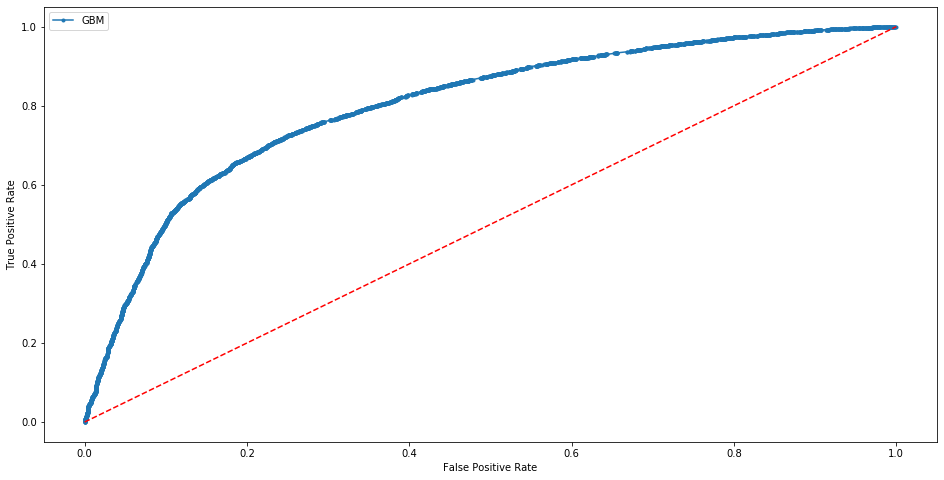

In [ ]:
prob = gbm_best_model.predict_proba(x_val)
prob = prob[:, 1]

auc = roc_auc_score(y_val, prob)
print('ROC AUC=%.3f' % (auc))
fpr, tpr, _ = roc_curve(y_val, prob)


plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, marker='.', label='GBM')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Feature Importance

feature_imp = pd.DataFrame(gbm_best_model.feature_importances_, index=x_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
High Blood Pressure,0.753457
Age,0.120111
Cholesterol_too high,0.049877
Low Blood Pressure,0.025972
Cholesterol_normal,0.023822
Weight,0.015851
Exercise,0.004170
Height,0.001823
Smoke,0.001140
Gender_female,0.000983


## Model Comparison 

We can compare the above models based on the Accuracy.
Reason: We are doing so because the dataset is balanced. This means that the dataset has equal number of observations for each class. This reason allows us to consider accuracy as the evaluation metric.

In [33]:


data = [{'Model':['Naive Bayes'],
        'Parameters' :['var_smoothing: 0.001'],                               
        'Accuracy(%)':[72.02],
}
,
{'Model':['KNN'],
        'Parameters' :['n_neighbors: 60, p: 1'],                                          
        'Accuracy(%)':[72.26],
}
,
{'Model':['Linear SVC'],
        'Parameters' :['C: 1, penalty: l2'],                                          
        'Accuracy(%)':[72.96],
}
,
{'Model':['NonLinear SVM'],
        'Parameters' :['C=1,gamma=0.7'],                                           
        'Accuracy(%)':[71.13]
}
,
{'Model':['Random Forest'],
        'Parameters' :['n_estimators=100, max_features=6, max_depth=20, min_samples_leaf=10,min_samples_split=10'],                                           
        'Accuracy(%)':[73.25]
},
{'Model':['GBM'],
        'Parameters' :['n_estimators=100, learning_rate=0.1,max_depth= 2,min_samples_leaf=10,min_samples_split=5'],                                           
        'Accuracy(%)':[73.58]
}] 


In [34]:
df_comparison = pd.DataFrame(data=data)
df_comparison.sort_values(by=['Accuracy(%)'],ascending=False)

,Model,Parameters,Accuracy(%)
5,[GBM],"[n_estimators=100, learning_rate=0.1,max_depth...",[73.58]
4,[Random Forest],"[n_estimators=100, max_features=6, max_depth=2...",[73.25]
2,[Linear SVC],"[C: 1, penalty: l2]",[72.96]
1,[KNN],"[n_neighbors: 60, p: 1]",[72.26]
0,[Naive Bayes],[var_smoothing: 0.001],[72.02]
3,[NonLinear SVM],"[C=1,gamma=0.7]",[71.13]


## Conclusion

Based on the above evaluation metrics we can clearly see that GBM is able to perform best when compared to all the other models. That is followed by the Random Forest, Linear SVC, KNN, Naive Bayes and NonLinear SVM. 

Reason (performance evaluation): We consider having accuracy as the evaluation metrics because the dataset is balanced/ This means that number of observations for both the classes are almost equal. 

Reason (Feature Selection):The most important features according to GBM are High blood pressure, Age, cholestrol_toohigh. The top features for random forest are High blood pressure, Low blood pressure and Age. These features do make sense and therefore we can rely on GBM and random forest for the feature selection.

## CSV file prep of Final Predictions

In [ ]:
best_models = ['gnb_best','mnb_best','classifier','lin_clf_best','rbf_clf_best','rf_model','gbm_best_model']

In [45]:
#predictions for test data set
y_pred_mnb = gnb_best.predict(x_test)
y_pred_knn = classifier.predict(test_std)
y_pred_svc = lin_clf_best.predict(test_std)
y_pred_svm = rbf_clf_best.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
y_pred_gbm = gbm_best_model.predict(x_test)

In [52]:
d = {'id':ID,'NB': y_pred_mnb, 'KNN' : y_pred_knn, 'SVC' : y_pred_svc, 'SVM' : y_pred_svm, 'RF' : y_pred_rf, 'GBM' : y_pred_gbm}
label_df = pd.DataFrame(d)

In [53]:
label_df

,id,NB,KNN,SVC,SVM,RF,GBM
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,1,1,0,0
3,3,1,1,1,1,1,1
4,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...
20995,20995,1,1,1,1,0,1
20996,20996,0,0,0,0,0,0
20997,20997,1,1,0,1,1,0
20998,20998,1,1,1,1,1,1


In [54]:
label_df.to_csv('HW3_final_predictions.csv')